# Linear Regression Models

Our team created three linear regression models to predict U.S. counties' estimated hesitant, hesitant or unsure, and strongly hesistant rates, respectively, based on 25 features.

----------------------------- 
### **Feature Groups**

**Vaccine Availability:**
1. `the_number_of_providers` per FIPS code
2. `the_average_supply_level` for all location providers per FIPS code

**Community Risk/Vaccination Measures:**

3. `social_vulnerability_index_svi` ranges from 0 (least) to 1 (most) to measure community's vulnerability to disaster
4. `cvac_level_of_concern_for_vaccination_rollout` ranges from 0 (lowest) to 1 (highest) for concern for difficult vaccine rollout
5. `percent_adults_fully_vaccinated_against_covid_19_as_of_6_10_21`
6. `community_transmission_level` is either low, moderate, substantial, or high rate of transmission:
* based on total new COVID-19 cases per 100,000 persons in the last 7 days and percentage of positive SARS-CoV-2 diagnostic nucleic acid amplification tests (NAAT) in the last 7 days (higher of the two if different)

7. `completeness_pct` tells percent of people fully vaccinated with a reported, valid county FIPS code in the jurisdiction
8. `series_complete_pop_pct_ur_equity` combines 'fully vaccinated' percentage and metro/non-metro metric for ages of population:
* 1 = 0-49.9% fully vaccinated / metro county
* 2 = 50-64.9% fully vaccinated / metro county
* 3 = 65-79.9% fully vaccinated / metro county
* 4 = ≥80% fully vaccinated / metro county
* 5 = 0-49.9% fully vaccinated / non-metro county
* 6 = 50-64.9% fully vaccinated / non-metro county
* 7 = 65-79.9% fully vaccinated /non-metro county
* 8 = ≥80% fully vaccinated / non-metro county

**Orders/Bans and Other Guidance:**

9. `masks_order_code`where 1 = public mask mandate; 2 = no public mask mandate
10. `general_gb_order_code` indicates size of gatherings banned:
* 1 = No order (for gathering ban) found
* 2 = Ban of gatherings over 101 or more people
* 4 = Ban of gatherings over 26-50 people
* 6 = Ban of gatherings over 1-10 people
* 7 = Bans gatherings of any size

11. `general_or_under_6ft_bans_gatherings_over` tells max number of people that can gather without social distancing:
* No ban, 0, 6, 8, 10, 50, 150, or 250

12. `stay_at_home_order_code` based on stay at home order recommendation:
* 3 = Mandatory only for at-risk individuals in the jurisdiction
* 6 = Advisory/Recommendation
* 7 = No order for individuals to stay home or NA 

**Health Conditions** (county average estimates of prevalence of specified health conditions in adults 2019):

13. `avg_copd` (chronic obstructive pulmonary disease)
14. `avg_chd` (coronary heart disease)
15. `avg_ghlth` for fair or poor health
16. `avg_lpa` for no leisure-time physical activity
17. `avg_mhlth` for mental health not good for >=14 days
18. `avg_obesity`
19. `avg_sleep` for sleeping less than 7 hours
20. `avg_checkup`
21. `avg_asthma`
22. `avg_smoking`
23. `avg_depression`
24. `avg_diabetes`

**Other:**

25. `fips_code` is Federal Information Processing Standards (FIPS) Code; unique to each county
26. `metro_status` for metro (metropolitan county) vs non-metro

# Clean Data:

In [318]:
# import dependencies
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [319]:
# load file
df = pd.read_csv(Path('Resources/(new)joined_8_tables_on_county_level.csv'))
df

,county_fips_code,the_number_of_providers,the_average_supply_level,fips_code,county_name,social_vulnerability_index_svi,cvac_level_of_concern_for_vaccination_rollout,percent_adults_fully_vaccinated_against_covid_19_as_of_6_10_21,estimated_hesitant,estimated_hesitant_or_unsure,...,avg_checkup,avg_copd,avg_smoking,avg_depression,avg_diabetes,avg_ghlth,avg_lpa,avg_mhlth,avg_obesity,avg_sleep
0,10001,195,0.333333,10001,"Kent County, Delaware",0.73,0.32,0.435,0.0664,0.1391,...,80.593750,8.821875,19.321875,20.575000,12.378125,20.303125,31.053125,16.381250,40.696875,38.543750
1,10003,638,0.194357,10003,"New Castle County, Delaware",0.38,0.16,0.552,0.0564,0.1180,...,79.198450,7.067442,16.818605,20.256589,10.819380,18.208527,27.695349,14.471318,33.551938,36.662791
2,10005,295,0.196610,10005,"Sussex County, Delaware",0.40,0.12,0.569,0.0555,0.1121,...,81.164151,9.215094,16.686792,18.324528,12.662264,19.600000,27.286792,13.303774,34.924528,33.426415
3,11001,678,0.244838,11001,"District of Columbia, District of Columbia",0.60,0.17,0.546,0.0655,0.0850,...,79.094944,4.977528,15.800000,20.562921,9.938202,16.479775,20.893820,13.581461,28.410112,37.917978
4,12001,345,0.382609,12001,"Alachua County, Florida",0.47,0.63,0.547,0.1167,0.1711,...,76.055357,7.030357,16.417857,21.016071,9.007143,17.764286,24.160714,17.630357,30.223214,35.637500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2616,56037,39,0.102564,56037,"Sweetwater County, Wyoming",0.37,0.56,0.348,0.2184,0.2843,...,65.275000,5.983333,18.658333,19.225000,7.541667,15.700000,24.366667,13.900000,33.166667,35.808333
2617,56039,15,0.000000,56039,"Teton County, Wyoming",0.11,0.44,0.789,0.2050,0.2671,...,65.425000,4.425000,12.175000,16.825000,6.025000,10.950000,17.500000,10.875000,21.975000,27.325000
2618,56041,33,-0.090909,56041,"Uinta County, Wyoming",0.45,0.48,0.388,0.2184,0.2843,...,63.466667,7.200000,20.266667,19.833333,8.066667,17.100000,27.466667,14.533333,30.133333,36.333333
2619,56043,7,-0.714286,56043,"Washakie County, Wyoming",0.37,0.69,0.364,0.2283,0.2943,...,66.966667,8.033333,18.133333,18.000000,10.433333,18.466667,26.600000,13.033333,28.933333,31.466667


In [320]:
df.dtypes

county_fips_code                                                    int64
the_number_of_providers                                             int64
the_average_supply_level                                          float64
fips_code                                                           int64
county_name                                                        object
social_vulnerability_index_svi                                    float64
cvac_level_of_concern_for_vaccination_rollout                     float64
percent_adults_fully_vaccinated_against_covid_19_as_of_6_10_21    float64
estimated_hesitant                                                float64
estimated_hesitant_or_unsure                                      float64
estimated_strongly_hesitant                                       float64
masks_order_code                                                    int64
completeness_pct                                                  float64
metro_status                          

In [321]:
# drop redundant columns
df = df.drop(['county_fips_code', 'county_name', 'indoor_outdoor', 'series_complete_pop_pct', 'series_complete_yes', 'series_complete_pop_pct_svi', 'cases_per_100k_7_day_count_change', 'general_gb_order_group'], axis=1)
df

,the_number_of_providers,the_average_supply_level,fips_code,social_vulnerability_index_svi,cvac_level_of_concern_for_vaccination_rollout,percent_adults_fully_vaccinated_against_covid_19_as_of_6_10_21,estimated_hesitant,estimated_hesitant_or_unsure,estimated_strongly_hesitant,masks_order_code,...,avg_checkup,avg_copd,avg_smoking,avg_depression,avg_diabetes,avg_ghlth,avg_lpa,avg_mhlth,avg_obesity,avg_sleep
0,195,0.333333,10001,0.73,0.32,0.435,0.0664,0.1391,0.0388,2,...,80.593750,8.821875,19.321875,20.575000,12.378125,20.303125,31.053125,16.381250,40.696875,38.543750
1,638,0.194357,10003,0.38,0.16,0.552,0.0564,0.1180,0.0329,2,...,79.198450,7.067442,16.818605,20.256589,10.819380,18.208527,27.695349,14.471318,33.551938,36.662791
2,295,0.196610,10005,0.40,0.12,0.569,0.0555,0.1121,0.0328,2,...,81.164151,9.215094,16.686792,18.324528,12.662264,19.600000,27.286792,13.303774,34.924528,33.426415
3,678,0.244838,11001,0.60,0.17,0.546,0.0655,0.0850,0.0403,2,...,79.094944,4.977528,15.800000,20.562921,9.938202,16.479775,20.893820,13.581461,28.410112,37.917978
4,345,0.382609,12001,0.47,0.63,0.547,0.1167,0.1711,0.0755,2,...,76.055357,7.030357,16.417857,21.016071,9.007143,17.764286,24.160714,17.630357,30.223214,35.637500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2616,39,0.102564,56037,0.37,0.56,0.348,0.2184,0.2843,0.1584,2,...,65.275000,5.983333,18.658333,19.225000,7.541667,15.700000,24.366667,13.900000,33.166667,35.808333
2617,15,0.000000,56039,0.11,0.44,0.789,0.2050,0.2671,0.1472,2,...,65.425000,4.425000,12.175000,16.825000,6.025000,10.950000,17.500000,10.875000,21.975000,27.325000
2618,33,-0.090909,56041,0.45,0.48,0.388,0.2184,0.2843,0.1584,2,...,63.466667,7.200000,20.266667,19.833333,8.066667,17.100000,27.466667,14.533333,30.133333,36.333333
2619,7,-0.714286,56043,0.37,0.69,0.364,0.2283,0.2943,0.1687,2,...,66.966667,8.033333,18.133333,18.000000,10.433333,18.466667,26.600000,13.033333,28.933333,31.466667


In [322]:
## check total nulls per column
df.isnull().sum()

the_number_of_providers                                             0
the_average_supply_level                                            0
fips_code                                                           0
social_vulnerability_index_svi                                      1
cvac_level_of_concern_for_vaccination_rollout                       0
percent_adults_fully_vaccinated_against_covid_19_as_of_6_10_21    214
estimated_hesitant                                                  0
estimated_hesitant_or_unsure                                        0
estimated_strongly_hesitant                                         0
masks_order_code                                                    0
completeness_pct                                                    0
metro_status                                                        0
series_complete_pop_pct_ur_equity                                 215
general_gb_order_code                                               0
general_or_under_6ft

In [323]:
# fill nulls: use column means for columns with continous data, column mode values for categorical columns
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(missing_values = np.NaN, strategy='mean',add_indicator=True)
mode_imputer = SimpleImputer(missing_values = np.NaN, strategy='most_frequent', add_indicator=True)

vaccine_series = mean_imputer.fit_transform(np.array(df['percent_adults_fully_vaccinated_against_covid_19_as_of_6_10_21']).reshape(-1,1))
 
equity_series = mode_imputer.fit_transform(np.array(df['series_complete_pop_pct_ur_equity']).reshape(-1,1))
gathering_bans = mode_imputer.fit_transform(np.array(df['general_or_under_6ft_bans_gatherings_over']).reshape(-1,1))

df['percent_adults_fully_vaccinated_against_covid_19_as_of_6_10_21'] = np.array(vaccine_series)
df['series_complete_pop_pct_ur_equity'] = np.array(equity_series)
df['general_or_under_6ft_bans_gatherings_over'] = np.array(gathering_bans)
df

,the_number_of_providers,the_average_supply_level,fips_code,social_vulnerability_index_svi,cvac_level_of_concern_for_vaccination_rollout,percent_adults_fully_vaccinated_against_covid_19_as_of_6_10_21,estimated_hesitant,estimated_hesitant_or_unsure,estimated_strongly_hesitant,masks_order_code,...,avg_checkup,avg_copd,avg_smoking,avg_depression,avg_diabetes,avg_ghlth,avg_lpa,avg_mhlth,avg_obesity,avg_sleep
0,195,0.333333,10001,0.73,0.32,0.435,0.0664,0.1391,0.0388,2,...,80.593750,8.821875,19.321875,20.575000,12.378125,20.303125,31.053125,16.381250,40.696875,38.543750
1,638,0.194357,10003,0.38,0.16,0.552,0.0564,0.1180,0.0329,2,...,79.198450,7.067442,16.818605,20.256589,10.819380,18.208527,27.695349,14.471318,33.551938,36.662791
2,295,0.196610,10005,0.40,0.12,0.569,0.0555,0.1121,0.0328,2,...,81.164151,9.215094,16.686792,18.324528,12.662264,19.600000,27.286792,13.303774,34.924528,33.426415
3,678,0.244838,11001,0.60,0.17,0.546,0.0655,0.0850,0.0403,2,...,79.094944,4.977528,15.800000,20.562921,9.938202,16.479775,20.893820,13.581461,28.410112,37.917978
4,345,0.382609,12001,0.47,0.63,0.547,0.1167,0.1711,0.0755,2,...,76.055357,7.030357,16.417857,21.016071,9.007143,17.764286,24.160714,17.630357,30.223214,35.637500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2616,39,0.102564,56037,0.37,0.56,0.348,0.2184,0.2843,0.1584,2,...,65.275000,5.983333,18.658333,19.225000,7.541667,15.700000,24.366667,13.900000,33.166667,35.808333
2617,15,0.000000,56039,0.11,0.44,0.789,0.2050,0.2671,0.1472,2,...,65.425000,4.425000,12.175000,16.825000,6.025000,10.950000,17.500000,10.875000,21.975000,27.325000
2618,33,-0.090909,56041,0.45,0.48,0.388,0.2184,0.2843,0.1584,2,...,63.466667,7.200000,20.266667,19.833333,8.066667,17.100000,27.466667,14.533333,30.133333,36.333333
2619,7,-0.714286,56043,0.37,0.69,0.364,0.2283,0.2943,0.1687,2,...,66.966667,8.033333,18.133333,18.000000,10.433333,18.466667,26.600000,13.033333,28.933333,31.466667


In [324]:
## check total nulls per column
df.isnull().sum()

the_number_of_providers                                            0
the_average_supply_level                                           0
fips_code                                                          0
social_vulnerability_index_svi                                     1
cvac_level_of_concern_for_vaccination_rollout                      0
percent_adults_fully_vaccinated_against_covid_19_as_of_6_10_21     0
estimated_hesitant                                                 0
estimated_hesitant_or_unsure                                       0
estimated_strongly_hesitant                                        0
masks_order_code                                                   0
completeness_pct                                                   0
metro_status                                                       0
series_complete_pop_pct_ur_equity                                  0
general_gb_order_code                                              0
general_or_under_6ft_bans_gatherin

In [325]:
# drop remaining nulls
df = df.dropna()
df

,the_number_of_providers,the_average_supply_level,fips_code,social_vulnerability_index_svi,cvac_level_of_concern_for_vaccination_rollout,percent_adults_fully_vaccinated_against_covid_19_as_of_6_10_21,estimated_hesitant,estimated_hesitant_or_unsure,estimated_strongly_hesitant,masks_order_code,...,avg_checkup,avg_copd,avg_smoking,avg_depression,avg_diabetes,avg_ghlth,avg_lpa,avg_mhlth,avg_obesity,avg_sleep
0,195,0.333333,10001,0.73,0.32,0.435,0.0664,0.1391,0.0388,2,...,80.593750,8.821875,19.321875,20.575000,12.378125,20.303125,31.053125,16.381250,40.696875,38.543750
1,638,0.194357,10003,0.38,0.16,0.552,0.0564,0.1180,0.0329,2,...,79.198450,7.067442,16.818605,20.256589,10.819380,18.208527,27.695349,14.471318,33.551938,36.662791
2,295,0.196610,10005,0.40,0.12,0.569,0.0555,0.1121,0.0328,2,...,81.164151,9.215094,16.686792,18.324528,12.662264,19.600000,27.286792,13.303774,34.924528,33.426415
3,678,0.244838,11001,0.60,0.17,0.546,0.0655,0.0850,0.0403,2,...,79.094944,4.977528,15.800000,20.562921,9.938202,16.479775,20.893820,13.581461,28.410112,37.917978
4,345,0.382609,12001,0.47,0.63,0.547,0.1167,0.1711,0.0755,2,...,76.055357,7.030357,16.417857,21.016071,9.007143,17.764286,24.160714,17.630357,30.223214,35.637500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2616,39,0.102564,56037,0.37,0.56,0.348,0.2184,0.2843,0.1584,2,...,65.275000,5.983333,18.658333,19.225000,7.541667,15.700000,24.366667,13.900000,33.166667,35.808333
2617,15,0.000000,56039,0.11,0.44,0.789,0.2050,0.2671,0.1472,2,...,65.425000,4.425000,12.175000,16.825000,6.025000,10.950000,17.500000,10.875000,21.975000,27.325000
2618,33,-0.090909,56041,0.45,0.48,0.388,0.2184,0.2843,0.1584,2,...,63.466667,7.200000,20.266667,19.833333,8.066667,17.100000,27.466667,14.533333,30.133333,36.333333
2619,7,-0.714286,56043,0.37,0.69,0.364,0.2283,0.2943,0.1687,2,...,66.966667,8.033333,18.133333,18.000000,10.433333,18.466667,26.600000,13.033333,28.933333,31.466667


##### 22 rows with nulls were dropped; we do not believe this will have a huge impact on our data given the abundance of data remaining

# Pre-process/Encode Data:

In [326]:
# view data types
df.dtypes

the_number_of_providers                                             int64
the_average_supply_level                                          float64
fips_code                                                           int64
social_vulnerability_index_svi                                    float64
cvac_level_of_concern_for_vaccination_rollout                     float64
percent_adults_fully_vaccinated_against_covid_19_as_of_6_10_21    float64
estimated_hesitant                                                float64
estimated_hesitant_or_unsure                                      float64
estimated_strongly_hesitant                                       float64
masks_order_code                                                    int64
completeness_pct                                                  float64
metro_status                                                       object
series_complete_pop_pct_ur_equity                                 float64
general_gb_order_code                 

In [327]:
# show columns with object data types and their unique values count
df_cols_to_encode = df.dtypes[df.dtypes == 'object'].index
df[df_cols_to_encode].nunique()

metro_status                                 2
general_or_under_6ft_bans_gatherings_over    8
community_transmission_level                 4
dtype: int64

In [328]:
# print unique values in object columns
for i in df_cols_to_encode:
    print(f"{i}: {df[i].unique()}\n")

metro_status: ['Metro' 'Non-metro']

general_or_under_6ft_bans_gatherings_over: ['No ban' '10' '50' '150' '250' '6' '8' '0']

community_transmission_level: ['moderate' 'low' 'substantial' 'high']



In [329]:
# label encoder for object type columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_new = df.copy()
df_new['metro_status'] = le.fit_transform(df_new['metro_status'])
df_new['general_or_under_6ft_bans_gatherings_over'] = le.fit_transform(df_new['general_or_under_6ft_bans_gatherings_over'])
df_new['community_transmission_level'] = le.fit_transform(df_new['community_transmission_level'])
df_new['general_or_under_6ft_bans_gatherings_over'] = le.fit_transform(df_new['general_or_under_6ft_bans_gatherings_over'])
df_new

,the_number_of_providers,the_average_supply_level,fips_code,social_vulnerability_index_svi,cvac_level_of_concern_for_vaccination_rollout,percent_adults_fully_vaccinated_against_covid_19_as_of_6_10_21,estimated_hesitant,estimated_hesitant_or_unsure,estimated_strongly_hesitant,masks_order_code,...,avg_checkup,avg_copd,avg_smoking,avg_depression,avg_diabetes,avg_ghlth,avg_lpa,avg_mhlth,avg_obesity,avg_sleep
0,195,0.333333,10001,0.73,0.32,0.435,0.0664,0.1391,0.0388,2,...,80.593750,8.821875,19.321875,20.575000,12.378125,20.303125,31.053125,16.381250,40.696875,38.543750
1,638,0.194357,10003,0.38,0.16,0.552,0.0564,0.1180,0.0329,2,...,79.198450,7.067442,16.818605,20.256589,10.819380,18.208527,27.695349,14.471318,33.551938,36.662791
2,295,0.196610,10005,0.40,0.12,0.569,0.0555,0.1121,0.0328,2,...,81.164151,9.215094,16.686792,18.324528,12.662264,19.600000,27.286792,13.303774,34.924528,33.426415
3,678,0.244838,11001,0.60,0.17,0.546,0.0655,0.0850,0.0403,2,...,79.094944,4.977528,15.800000,20.562921,9.938202,16.479775,20.893820,13.581461,28.410112,37.917978
4,345,0.382609,12001,0.47,0.63,0.547,0.1167,0.1711,0.0755,2,...,76.055357,7.030357,16.417857,21.016071,9.007143,17.764286,24.160714,17.630357,30.223214,35.637500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2616,39,0.102564,56037,0.37,0.56,0.348,0.2184,0.2843,0.1584,2,...,65.275000,5.983333,18.658333,19.225000,7.541667,15.700000,24.366667,13.900000,33.166667,35.808333
2617,15,0.000000,56039,0.11,0.44,0.789,0.2050,0.2671,0.1472,2,...,65.425000,4.425000,12.175000,16.825000,6.025000,10.950000,17.500000,10.875000,21.975000,27.325000
2618,33,-0.090909,56041,0.45,0.48,0.388,0.2184,0.2843,0.1584,2,...,63.466667,7.200000,20.266667,19.833333,8.066667,17.100000,27.466667,14.533333,30.133333,36.333333
2619,7,-0.714286,56043,0.37,0.69,0.364,0.2283,0.2943,0.1687,2,...,66.966667,8.033333,18.133333,18.000000,10.433333,18.466667,26.600000,13.033333,28.933333,31.466667


In [330]:
df_new.dtypes

the_number_of_providers                                             int64
the_average_supply_level                                          float64
fips_code                                                           int64
social_vulnerability_index_svi                                    float64
cvac_level_of_concern_for_vaccination_rollout                     float64
percent_adults_fully_vaccinated_against_covid_19_as_of_6_10_21    float64
estimated_hesitant                                                float64
estimated_hesitant_or_unsure                                      float64
estimated_strongly_hesitant                                       float64
masks_order_code                                                    int64
completeness_pct                                                  float64
metro_status                                                        int32
series_complete_pop_pct_ur_equity                                 float64
general_gb_order_code                 

# Visualize Correlations

In [331]:
# create correlations
df_new.corr()

,the_number_of_providers,the_average_supply_level,fips_code,social_vulnerability_index_svi,cvac_level_of_concern_for_vaccination_rollout,percent_adults_fully_vaccinated_against_covid_19_as_of_6_10_21,estimated_hesitant,estimated_hesitant_or_unsure,estimated_strongly_hesitant,masks_order_code,...,avg_checkup,avg_copd,avg_smoking,avg_depression,avg_diabetes,avg_ghlth,avg_lpa,avg_mhlth,avg_obesity,avg_sleep
the_number_of_providers,1.000000,-0.011681,-0.000865,0.007244,-0.089750,0.207309,-0.186001,-0.199758,-0.186151,-0.052746,...,0.022641,-0.241729,-0.211585,-0.121521,-0.156962,-0.125730,-0.196528,-0.083107,-0.247439,0.062501
the_average_supply_level,-0.011681,1.000000,-0.055934,0.100824,0.091246,-0.109342,0.057160,0.080001,0.040062,0.006970,...,-0.060630,0.070098,0.084036,0.095073,0.056711,0.094663,0.065243,0.150126,0.048293,0.088905
fips_code,-0.000865,-0.055934,1.000000,-0.017411,-0.003380,0.004160,-0.270870,-0.256744,-0.192975,0.021142,...,-0.134346,-0.086945,-0.138326,0.082592,-0.033743,0.004620,-0.122596,-0.114369,-0.023996,-0.005339
social_vulnerability_index_svi,0.007244,0.100824,-0.017411,1.000000,0.715856,-0.304230,0.265002,0.383979,0.286073,-0.000568,...,0.095789,0.491502,0.569923,0.317137,0.666970,0.785000,0.641297,0.673423,0.488451,0.571969
cvac_level_of_concern_for_vaccination_rollout,-0.089750,0.091246,-0.003380,0.715856,1.000000,-0.405970,0.311969,0.427525,0.323999,0.253467,...,-0.131616,0.421467,0.440583,0.298311,0.592924,0.695900,0.575033,0.544091,0.404618,0.375001
percent_adults_fully_vaccinated_against_covid_19_as_of_6_10_21,0.207309,-0.109342,0.004160,-0.304230,-0.405970,1.000000,-0.199598,-0.290742,-0.213691,-0.185669,...,-0.094175,-0.358764,-0.370902,-0.198275,-0.385976,-0.419510,-0.431392,-0.427618,-0.299649,-0.372158
estimated_hesitant,-0.186001,0.057160,-0.270870,0.265002,0.311969,-0.199598,1.000000,0.958987,0.973018,0.226971,...,0.030974,0.382538,0.464879,0.321467,0.268897,0.365966,0.433827,0.403252,0.315038,0.253893
estimated_hesitant_or_unsure,-0.199758,0.080001,-0.256744,0.383979,0.427525,-0.290742,0.958987,1.000000,0.932726,0.216058,...,0.098000,0.442789,0.531361,0.321953,0.390303,0.475690,0.537477,0.502955,0.420859,0.354664
estimated_strongly_hesitant,-0.186151,0.040062,-0.192975,0.286073,0.323999,-0.213691,0.973018,0.932726,1.000000,0.190755,...,0.041435,0.398125,0.455032,0.350993,0.280236,0.386908,0.440861,0.397056,0.291045,0.267900
masks_order_code,-0.052746,0.006970,0.021142,-0.000568,0.253467,-0.185669,0.226971,0.216058,0.190755,1.000000,...,-0.169313,-0.136558,-0.095094,-0.295514,0.064854,-0.024473,0.128905,-0.153491,0.051028,-0.189632


<AxesSubplot:>

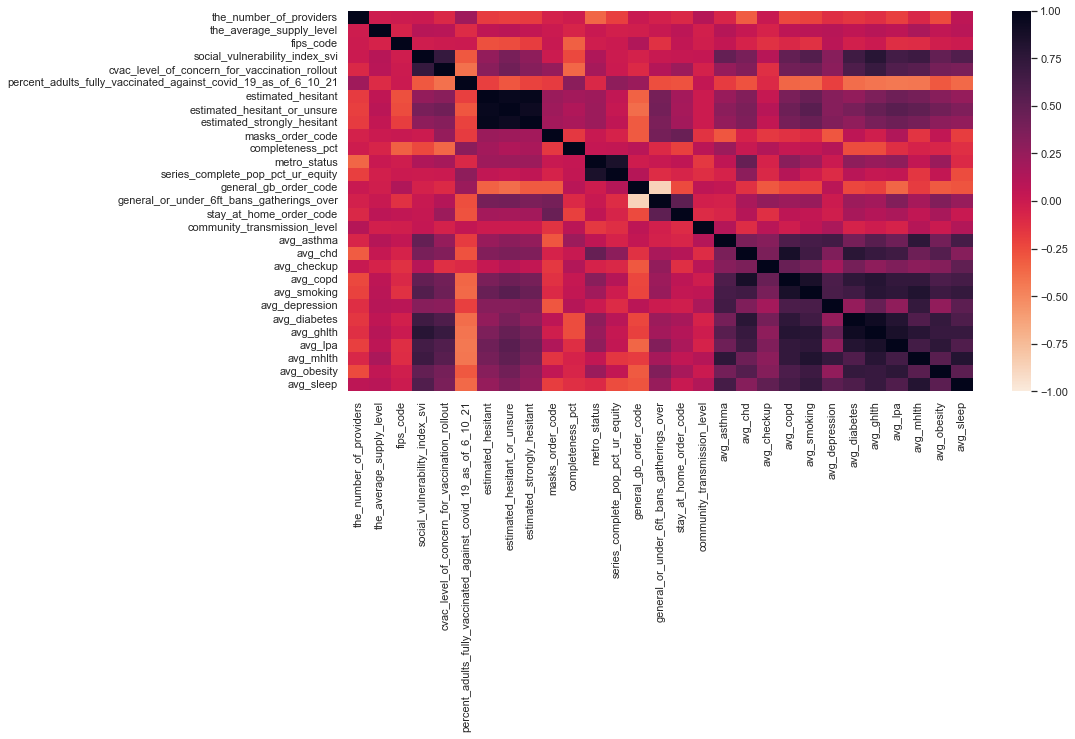

In [332]:
# visualize correlations with seaborn heatmap
import seaborn as sns
sns.set(rc = {'figure.figsize':(14,7)})
sns.heatmap(df_new.corr(), cmap=sns.cm.rocket_r, vmin=-1, vmax=1)

*shows column correlations: all three targets have a strong positive correlation to one another (dark blue), and the prevalence of a majority of health factors are also somewhat positively correlated to one another*

color scale: strong negative (light) to neutral (middle range) to strong positive (dark blue) correlation

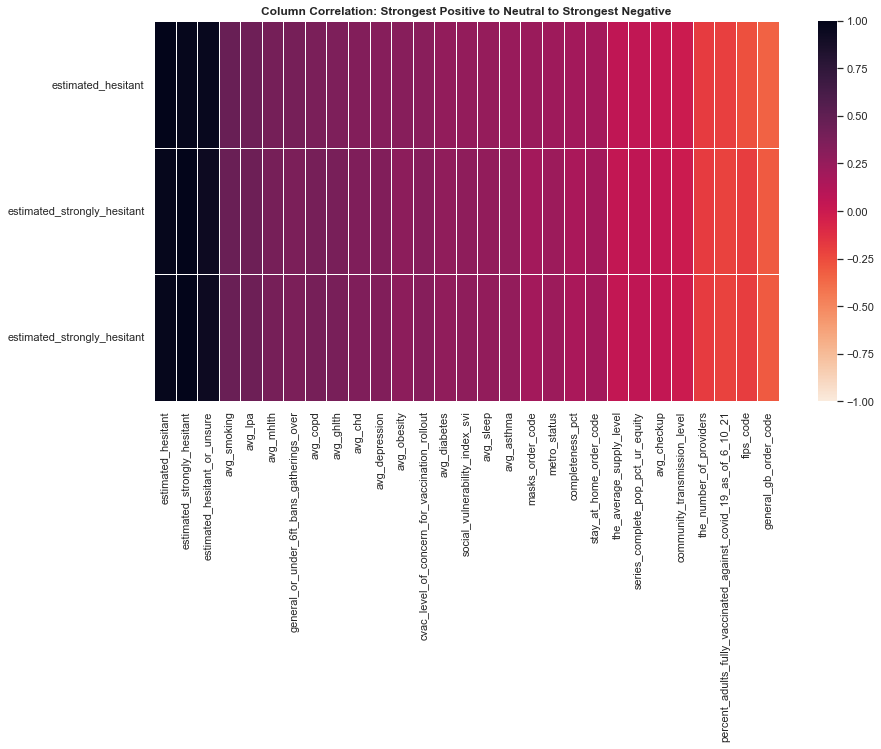

In [333]:
# show only for targets
ax = plt.axes()
sns.set(rc = {'figure.figsize':(14,2)})
sns.heatmap((df_new.corr()[["estimated_hesitant", "estimated_strongly_hesitant", "estimated_strongly_hesitant"]]).sort_values('estimated_hesitant', ascending=False).transpose(),
            cmap=sns.cm.rocket_r, vmin=-1, vmax=1, linewidth=-.5, ax=ax)
ax.set_title('Column Correlation: Strongest Positive to Neutral to Strongest Negative', fontweight='bold')
plt.show()

# Define Features Set and Three Targets:

In [334]:
# define features set used for all three targets
X = df_new.copy()
X = X.drop(['estimated_hesitant', 'estimated_hesitant_or_unsure', 'estimated_strongly_hesitant'], axis=1)
X.head()

,the_number_of_providers,the_average_supply_level,fips_code,social_vulnerability_index_svi,cvac_level_of_concern_for_vaccination_rollout,percent_adults_fully_vaccinated_against_covid_19_as_of_6_10_21,masks_order_code,completeness_pct,metro_status,series_complete_pop_pct_ur_equity,...,avg_checkup,avg_copd,avg_smoking,avg_depression,avg_diabetes,avg_ghlth,avg_lpa,avg_mhlth,avg_obesity,avg_sleep
0,195,0.333333,10001,0.73,0.32,0.435,2,96.1,0,2.0,...,80.593750,8.821875,19.321875,20.575000,12.378125,20.303125,31.053125,16.381250,40.696875,38.543750
1,638,0.194357,10003,0.38,0.16,0.552,2,96.1,0,3.0,...,79.198450,7.067442,16.818605,20.256589,10.819380,18.208527,27.695349,14.471318,33.551938,36.662791
2,295,0.196610,10005,0.40,0.12,0.569,2,96.1,0,3.0,...,81.164151,9.215094,16.686792,18.324528,12.662264,19.600000,27.286792,13.303774,34.924528,33.426415
3,678,0.244838,11001,0.60,0.17,0.546,2,94.6,0,3.0,...,79.094944,4.977528,15.800000,20.562921,9.938202,16.479775,20.893820,13.581461,28.410112,37.917978
4,345,0.382609,12001,0.47,0.63,0.547,2,98.7,0,3.0,...,76.055357,7.030357,16.417857,21.016071,9.007143,17.764286,24.160714,17.630357,30.223214,35.637500


# Train, Test, Evaluate Model
* R2 Score tells the percentage of variation in the test set the model can explain.

$$
R^2 = \frac{Variance\ explained\ by\ model"}{"Total\ variance"}
$$

* Mean absolute error (MAE) tells how much of an error in our predictions we can expect on average.

* Mean Squared Error (MSE) averages the square of the prediction errors over all instances in the test set and is similar to R2.

##  Target: Estimated Hesitant

In [335]:
# set target
y = df_new['estimated_hesitant']

In [336]:
# split data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1)
X_train.shape

(1949, 26)

In [337]:
# fit the model
from sklearn.linear_model import LinearRegression
classifier = LinearRegression().fit(X_train, y_train)

In [338]:
# predict with test data
y_pred = classifier.predict(X_test)
y_pred

array([ 0.11765941,  0.07850302,  0.07034853,  0.14628036,  0.13233749,
        0.15355549,  0.12008405,  0.12746019,  0.15988323,  0.162596  ,
        0.12980224,  0.16680944,  0.16063666,  0.12096948,  0.12769847,
        0.09700468,  0.13536195,  0.15859349,  0.12066898,  0.07225631,
        0.17393608,  0.18406195,  0.10101267,  0.16386995,  0.09764492,
        0.09886439,  0.096771  ,  0.16517287,  0.13319033,  0.11323071,
        0.12689686,  0.10570982,  0.14087131,  0.10862393,  0.12352706,
        0.18078623,  0.12459497,  0.153261  ,  0.12023372,  0.07685696,
        0.13410944,  0.13820194,  0.14316352,  0.12478551,  0.03980036,
        0.1233477 ,  0.08247069,  0.1077004 ,  0.16929042,  0.10816117,
        0.11722697,  0.12443536,  0.13148693,  0.14756455,  0.11124502,
        0.08832796,  0.13823634,  0.12529187,  0.14814175,  0.13322829,
        0.04637434,  0.11527851,  0.05458444,  0.17356518,  0.12143359,
        0.12279476,  0.13466708,  0.12951015,  0.17300119,  0.14

In [339]:
# Model Evaluation:
from sklearn import metrics
from sklearn.metrics import r2_score
hes_R2 = r2_score(y_test, y_pred)
hes_MAE = metrics.mean_absolute_error(y_test, y_pred)
hes_MSE = metrics.mean_squared_error(y_test, y_pred)
print("\n*****Linear Regression Model Evaluation*****")
print("---------------------------------------")
print("Target Predicted : Estimated Hesitant\n")
print(f"R2 Score : {hes_R2}")
print(f"Mean Absolute Error : {hes_MAE}")
print(f"Mean Squared Error : {hes_MSE}")


*****Linear Regression Model Evaluation*****
---------------------------------------
Target Predicted : Estimated Hesitant

R2 Score : 0.5949192578825278
Mean Absolute Error : 0.021537874832911166
Mean Squared Error : 0.0007525574191613264


# Train, Test, Evaluate Model
##  Target: Estimated Hesitant or Unsure

In [340]:
# set target
y = df_new['estimated_hesitant_or_unsure']

In [341]:
# split data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1)
X_train.shape

(1949, 26)

In [342]:
# fit the model
from sklearn.linear_model import LinearRegression
classifier = LinearRegression().fit(X_train, y_train)

In [343]:
# predict with test data
y_pred = classifier.predict(X_test)
y_pred

array([0.1783531 , 0.1244803 , 0.13231383, 0.20909352, 0.19024676,
       0.20311816, 0.17913482, 0.19128327, 0.23056376, 0.22377959,
       0.18344662, 0.23778382, 0.22175441, 0.16691794, 0.18185695,
       0.15556324, 0.19154335, 0.2255433 , 0.18734365, 0.16056642,
       0.23733114, 0.26055974, 0.15110748, 0.22507066, 0.1465529 ,
       0.13757636, 0.15831854, 0.23431196, 0.21426494, 0.1672532 ,
       0.180524  , 0.16251391, 0.19612312, 0.17848104, 0.19271498,
       0.2528379 , 0.17351438, 0.21577439, 0.17992611, 0.12248958,
       0.19127068, 0.20429691, 0.20567289, 0.18485028, 0.08855685,
       0.16677339, 0.12020546, 0.16800802, 0.23619351, 0.15732517,
       0.15451216, 0.16503707, 0.19424383, 0.20639596, 0.17144506,
       0.15987371, 0.19758267, 0.16574929, 0.2165681 , 0.18711912,
       0.09019164, 0.18652655, 0.11221737, 0.23731618, 0.19445104,
       0.19772943, 0.20888228, 0.19310694, 0.23801637, 0.22053421,
       0.2278699 , 0.22838798, 0.18985933, 0.13156454, 0.13135

In [344]:
# Model Evaluation:
from sklearn.metrics import r2_score
hes_unsure_R2 = r2_score(y_test, y_pred)
hes_unsure_MAE = metrics.mean_absolute_error(y_test, y_pred)
hes_unsure_MSE = metrics.mean_squared_error(y_test, y_pred)
print("\n*****Linear Regression Model Evaluation*****")
print("---------------------------------------")
print("Target Predicted : Estimated Hesitant or Unsure\n")
print(f"R2 Score : {hes_unsure_R2}")
print("Mean Absolute Error :", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error :", metrics.mean_squared_error(y_test, y_pred))


*****Linear Regression Model Evaluation*****
---------------------------------------
Target Predicted : Estimated Hesitant or Unsure

R2 Score : 0.6131145641173289
Mean Absolute Error : 0.02367113100690032
Mean Squared Error : 0.0009599090559074881


# Train, Test, Evaluate Model
##  Target: Estimated Strongly Hesitant

In [345]:
# set target
y = df_new['estimated_strongly_hesitant']

In [346]:
# split data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1)
X_train.shape

(1949, 26)

In [347]:
# fit the model
from sklearn.linear_model import LinearRegression
classifier = LinearRegression().fit(X_train, y_train)

In [348]:
# predict with test data
y_pred = classifier.predict(X_test)
y_pred

array([ 0.07076007,  0.05402158,  0.04311551,  0.09614834,  0.08432044,
        0.10457378,  0.07410195,  0.08639859,  0.10527302,  0.10821615,
        0.08545698,  0.1110285 ,  0.1039616 ,  0.07609883,  0.0811579 ,
        0.06119724,  0.08413462,  0.09834083,  0.0822003 ,  0.0481656 ,
        0.11200396,  0.11778325,  0.05682657,  0.10343702,  0.05582611,
        0.06915945,  0.0680304 ,  0.11503667,  0.08145367,  0.06918355,
        0.07668337,  0.07243614,  0.09119595,  0.07225208,  0.0805654 ,
        0.11484269,  0.08076298,  0.10227549,  0.07705111,  0.05617577,
        0.0853731 ,  0.08915278,  0.09480942,  0.07458078,  0.02810041,
        0.07137001,  0.06237392,  0.07610058,  0.11373961,  0.0727301 ,
        0.07201914,  0.08026551,  0.08314158,  0.09216353,  0.07088316,
        0.05675208,  0.08361951,  0.07830327,  0.10171614,  0.08587443,
        0.02994967,  0.07345462,  0.03525032,  0.11675328,  0.0789643 ,
        0.07840445,  0.0903185 ,  0.08254912,  0.11205872,  0.08

In [349]:
# Model Evaluation:
from sklearn.metrics import r2_score
strg_hes_R2 = r2_score(y_test, y_pred)
strg_hes_MAE = metrics.mean_absolute_error(y_test, y_pred)
strg_hes_MSE = metrics.mean_squared_error(y_test, y_pred)
print("\n*****Linear Regression Model Evaluation*****")
print("---------------------------------------")
print("Target Predicted : Estimated Strongly Hesitant")
print(f"R2 Score : {strg_hes_R2}")
print("Mean Absolute Error :", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error :", metrics.mean_squared_error(y_test, y_pred))


*****Linear Regression Model Evaluation*****
---------------------------------------
Target Predicted : Estimated Strongly Hesitant
R2 Score : 0.5380619423461188
Mean Absolute Error : 0.015834625561067905
Mean Squared Error : 0.0004039499662625572


# ***Repeat with Scaled Data:***

In [350]:
# scale the data
from sklearn.preprocessing import StandardScaler
data_scaler = StandardScaler()

df_new_scaled = pd.DataFrame(data_scaler.fit_transform(df_new), columns=df_new.columns, index=df_new.index)
df_new_scaled[:5]

,the_number_of_providers,the_average_supply_level,fips_code,social_vulnerability_index_svi,cvac_level_of_concern_for_vaccination_rollout,percent_adults_fully_vaccinated_against_covid_19_as_of_6_10_21,estimated_hesitant,estimated_hesitant_or_unsure,estimated_strongly_hesitant,masks_order_code,...,avg_checkup,avg_copd,avg_smoking,avg_depression,avg_diabetes,avg_ghlth,avg_lpa,avg_mhlth,avg_obesity,avg_sleep
0,0.377560,0.135182,-1.731616,0.834186,-0.567365,0.247040,-1.516579,-1.042442,-1.575542,0.556758,...,1.206460,0.025679,-0.365518,-0.499842,0.111550,-0.267063,-0.000728,0.185851,1.173609,0.518893
1,2.128064,-0.125376,-1.731465,-0.402378,-1.121160,1.103182,-1.747411,-1.458068,-1.772960,0.556758,...,0.810856,-0.799079,-1.015977,-0.598066,-0.522289,-0.699552,-0.608078,-0.582296,-0.635504,0.057460
2,0.772707,-0.121153,-1.731315,-0.331717,-1.259608,1.227579,-1.768186,-1.574286,-1.776306,0.556758,...,1.368184,0.210531,-1.050228,-1.194070,0.227091,-0.412243,-0.681977,-1.051865,-0.287961,-0.736481
3,2.286123,-0.030733,-1.656524,0.374891,-1.086548,1.059278,-1.537354,-2.108099,-1.525351,0.556758,...,0.781510,-1.781547,-1.280656,-0.503568,-0.880606,-1.056502,-1.838329,-0.940183,-1.937424,0.365380
4,0.970281,0.227566,-1.581432,-0.084404,0.505612,1.066595,-0.355490,-0.412109,-0.347535,0.556758,...,-0.080292,-0.816513,-1.120109,-0.363780,-1.259207,-0.791279,-1.247417,0.688224,-1.478343,-0.194062


# Define Features Set and Three Targets:

In [351]:
# define features set used for all three targets
X = df_new_scaled.copy()
X = X.drop(['estimated_hesitant', 'estimated_hesitant_or_unsure', 'estimated_strongly_hesitant'], axis=1)
X.head()

,the_number_of_providers,the_average_supply_level,fips_code,social_vulnerability_index_svi,cvac_level_of_concern_for_vaccination_rollout,percent_adults_fully_vaccinated_against_covid_19_as_of_6_10_21,masks_order_code,completeness_pct,metro_status,series_complete_pop_pct_ur_equity,...,avg_checkup,avg_copd,avg_smoking,avg_depression,avg_diabetes,avg_ghlth,avg_lpa,avg_mhlth,avg_obesity,avg_sleep
0,0.377560,0.135182,-1.731616,0.834186,-0.567365,0.247040,0.556758,0.499857,-1.265544,-1.249473,...,1.206460,0.025679,-0.365518,-0.499842,0.111550,-0.267063,-0.000728,0.185851,1.173609,0.518893
1,2.128064,-0.125376,-1.731465,-0.402378,-1.121160,1.103182,0.556758,0.499857,-1.265544,-0.731632,...,0.810856,-0.799079,-1.015977,-0.598066,-0.522289,-0.699552,-0.608078,-0.582296,-0.635504,0.057460
2,0.772707,-0.121153,-1.731315,-0.331717,-1.259608,1.227579,0.556758,0.499857,-1.265544,-0.731632,...,1.368184,0.210531,-1.050228,-1.194070,0.227091,-0.412243,-0.681977,-1.051865,-0.287961,-0.736481
3,2.286123,-0.030733,-1.656524,0.374891,-1.086548,1.059278,0.556758,0.447182,-1.265544,-0.731632,...,0.781510,-1.781547,-1.280656,-0.503568,-0.880606,-1.056502,-1.838329,-0.940183,-1.937424,0.365380
4,0.970281,0.227566,-1.581432,-0.084404,0.505612,1.066595,0.556758,0.591159,-1.265544,-0.731632,...,-0.080292,-0.816513,-1.120109,-0.363780,-1.259207,-0.791279,-1.247417,0.688224,-1.478343,-0.194062


# Train, Test, Evaluate Model
##  Target: Estimated Hesitant

In [352]:
# set target
y = df_new_scaled['estimated_hesitant']

In [353]:
# split data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1)
X_train.shape

(1949, 26)

In [354]:
# fit the model
from sklearn.linear_model import LinearRegression
classifier = LinearRegression().fit(X_train, y_train)

In [355]:
# predict with test data
y_pred = classifier.predict(X_test)
y_pred

array([-3.33344094e-01, -1.23720146e+00, -1.42543370e+00,  3.27321024e-01,
        5.47415410e-03,  4.95254749e-01, -2.77375363e-01, -1.07109928e-01,
        6.41319757e-01,  7.03939252e-01, -5.30478922e-02,  8.01199162e-01,
        6.58711253e-01, -2.56936770e-01, -1.01609769e-01, -8.10122605e-01,
        7.52884372e-02,  6.11548399e-01, -2.63873254e-01, -1.38139590e+00,
        9.65705346e-01,  1.19944355e+00, -7.17605084e-01,  7.33346133e-01,
       -7.95343700e-01, -7.67194369e-01, -8.15516635e-01,  7.63421826e-01,
        2.51602967e-02, -4.35572805e-01, -1.20113554e-01, -6.09179482e-01,
        2.02462388e-01, -5.41912285e-01, -1.97899546e-01,  1.12382926e+00,
       -1.73248664e-01,  4.88456964e-01, -2.73920432e-01, -1.27519784e+00,
        4.63764735e-02,  1.40844627e-01,  2.55374089e-01, -1.68850376e-01,
       -2.13058517e+00, -2.02039703e-01, -1.14561470e+00, -5.63230477e-01,
        8.58468299e-01, -5.52594457e-01, -3.43326068e-01, -1.76932824e-01,
       -1.41595464e-02,  

In [356]:
# Model Evaluation:
from sklearn.metrics import r2_score
scaled_hes_R2 = r2_score(y_test, y_pred)
scaled_hes_MAE = metrics.mean_absolute_error(y_test, y_pred)
scaled_hes_MSE = metrics.mean_squared_error(y_test, y_pred)
print("\n*****Linear Regression Model Evaluation*****")
print("---------------------------------------")
print("Target Predicted : Estimated Hesitant\n")
print(f"R2 Score : {scaled_hes_R2}")
print(f"Mean Absolute Error : {scaled_hes_MAE}")
print(f"Mean Squared Error :{scaled_hes_MSE}")


*****Linear Regression Model Evaluation*****
---------------------------------------
Target Predicted : Estimated Hesitant

R2 Score : 0.5949192578825293
Mean Absolute Error : 0.4971645120624054
Mean Squared Error :0.400990594296762


# Train, Test, Evaluate Model
##  Target: Estimated Hesitant or Unsure

In [357]:
# set target
y = df_new_scaled['estimated_hesitant_or_unsure']

In [358]:
# split data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1)
X_train.shape

(1949, 26)

In [359]:
# fit the model
from sklearn.linear_model import LinearRegression
classifier = LinearRegression().fit(X_train, y_train)

In [360]:
# predict with test data
y_pred = classifier.predict(X_test)
y_pred

array([-2.69238422e-01, -1.33041991e+00, -1.17611583e+00,  3.36283660e-01,
       -3.49580426e-02,  2.18581628e-01, -2.53840091e-01, -1.45409531e-02,
        7.59202656e-01,  6.25568601e-01, -1.68906636e-01,  9.01422775e-01,
        5.85676718e-01, -4.94487104e-01, -2.00219828e-01, -7.18151035e-01,
       -9.41790766e-03,  6.60310124e-01, -9.21433344e-02, -6.19598709e-01,
        8.92505928e-01,  1.35006071e+00, -8.05920154e-01,  6.51000060e-01,
       -8.95635910e-01, -1.07245499e+00, -6.63877299e-01,  8.33034291e-01,
        4.38149881e-01, -4.87883235e-01, -2.26476041e-01, -5.81237268e-01,
        8.07939960e-02, -2.66718226e-01,  1.36607138e-02,  1.19795657e+00,
       -3.64551021e-01,  4.67882925e-01, -2.38253393e-01, -1.36963296e+00,
       -1.47889096e-02,  2.41800433e-01,  2.68904442e-01, -1.41257484e-01,
       -2.03803690e+00, -4.97334481e-01, -1.41462536e+00, -4.73014829e-01,
        8.70096927e-01, -6.83444728e-01, -7.38855123e-01, -5.31536223e-01,
        4.37758969e-02,  

In [361]:
# Model Evaluation:
from sklearn.metrics import r2_score
scaled_hes_unsure_R2 = r2_score(y_test, y_pred)
scaled_hes_unsure_MAE = metrics.mean_absolute_error(y_test, y_pred)
scaled_hes_unsure_MSE = metrics.mean_squared_error(y_test, y_pred)
print("\n*****Linear Regression Model Evaluation*****")
print("---------------------------------------")
print("Target Predicted : Estimated Hesitant or Unsure\n")
print(f"R2 Score : {scaled_hes_unsure_R2}")
print("Mean Absolute Error :", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error :", metrics.mean_squared_error(y_test, y_pred))


*****Linear Regression Model Evaluation*****
---------------------------------------
Target Predicted : Estimated Hesitant or Unsure

R2 Score : 0.6131145641173316
Mean Absolute Error : 0.46627183582056186
Mean Squared Error : 0.3724521091994441


# Train, Test, Evaluate Model
##  Target: Estimated Strongly Hesitant

In [362]:
# set target
y = df_new_scaled['estimated_strongly_hesitant']

In [363]:
# split data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1)
X_train.shape

(1949, 26)

In [364]:
# fit the model
from sklearn.linear_model import LinearRegression
classifier = LinearRegression().fit(X_train, y_train)

In [365]:
# predict with test data
y_pred = classifier.predict(X_test)
y_pred

array([-5.06136465e-01, -1.06621737e+00, -1.43114171e+00,  3.43371962e-01,
       -5.23974747e-02,  6.25293003e-01, -3.94314716e-01,  1.71388822e-02,
        6.48689899e-01,  7.47169088e-01, -1.43681386e-02,  8.41272075e-01,
        6.04808967e-01, -3.27497992e-01, -1.58217929e-01, -8.26115248e-01,
       -5.86150474e-02,  4.16734378e-01, -1.23338798e-01, -1.26216229e+00,
        8.73911589e-01,  1.06729067e+00, -9.72360469e-01,  5.87256167e-01,
       -1.00583652e+00, -5.59694077e-01, -5.97473077e-01,  9.75388230e-01,
       -1.48321311e-01, -5.58887743e-01, -3.07938938e-01, -4.50054054e-01,
        1.77661784e-01, -4.56212650e-01, -1.78043418e-01,  9.68897463e-01,
       -1.71432204e-01,  5.48390566e-01, -2.95634153e-01, -9.94136683e-01,
       -1.71748158e-02,  1.09295911e-01,  2.98570894e-01, -3.78292738e-01,
       -1.93355697e+00, -4.85727417e-01, -7.86742685e-01, -3.27439251e-01,
        9.31987672e-01, -4.40217970e-01, -4.64006952e-01, -1.88077961e-01,
       -9.18429022e-02,  

In [366]:
# Model Evaluation:
from sklearn.metrics import r2_score
scaled_strg_hes_R2 = r2_score(y_test, y_pred)
scaled_strg_hes_MAE = metrics.mean_absolute_error(y_test, y_pred)
scaled_strg_hes_MSE = metrics.mean_squared_error(y_test, y_pred)
print("\n*****Linear Regression Model Evaluation*****")
print("---------------------------------------")
print("Target Predicted : Estimated Strongly Hesitant")
print(f"R2 Score : {scaled_strg_hes_R2}")
print("Mean Absolute Error :", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error :", metrics.mean_squared_error(y_test, y_pred))


*****Linear Regression Model Evaluation*****
---------------------------------------
Target Predicted : Estimated Strongly Hesitant
R2 Score : 0.5380619423461183
Mean Absolute Error : 0.5298371411962318
Mean Squared Error : 0.4522689548397375


In [368]:
# show all R2s
#R2_values = [[hes_R2, scaled_hes_R2], [hes_unsure_R2, scaled_hes_unsure_R2], [strg_hes_R2, scaled_strg_hes_R2]]
eval_scores =[
    [hes_R2, scaled_hes_R2, hes_MAE, scaled_hes_MAE, hes_MSE, scaled_hes_MSE],
    [hes_unsure_R2, scaled_hes_unsure_R2, hes_unsure_MAE, scaled_hes_unsure_MAE, hes_unsure_MSE, scaled_hes_unsure_MSE],
    [strg_hes_R2, scaled_strg_hes_R2, strg_hes_MAE, scaled_strg_hes_MAE, strg_hes_MSE, scaled_strg_hes_MSE]]
columns = ["R2 Non-Scaled", "R2 Scaled", "MAE Non-Scaled", "MAE Scaled", "MSE Non-Scaled", "MSE Scaled"]
index = ["hesitant", "hesitant or unsure", "strongly hesitant"]

eval_df = pd.DataFrame(eval_scores, columns=columns, index=index)

print("\n*****Evaluation Non-Scaled and Scaled Comparisons*****")
eval_df


*****Evaluation Non-Scaled and Scaled Comparisons*****


,R2 Non-Scaled,R2 Scaled,MAE Non-Scaled,MAE Scaled,MSE Non-Scaled,MSE Scaled
hesitant,0.594919,0.594919,0.021538,0.497165,0.000753,0.400991
hesitant or unsure,0.613115,0.613115,0.023671,0.466272,0.000960,0.372452
strongly hesitant,0.538062,0.538062,0.015835,0.529837,0.000404,0.452269
